# Explore here

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
data_train = pd.read_csv("https://raw.githubusercontent.com/EnriqueEsnola/Decision-Tree/main/data/processed/clean_train_data.csv")
data_test = pd.read_csv("https://raw.githubusercontent.com/EnriqueEsnola/Decision-Tree/main/data/processed/clean_test_data.csv")

In [37]:
# Dividimos el conjunto de datos
X_train = data_train.drop(['Outcome'], axis = 1)
y_train = data_train['Outcome']

X_test = data_test.drop(['Outcome'], axis = 1)
y_test = data_test['Outcome']

In [38]:
# Crear un modelo y entrenarlo
model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [41]:
model = RandomForestClassifier(random_state=42)
hyperparams = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [5, 10, 20, None] ,
    'max_features' : ['sqrt', 'log2'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

# Configurar la búsqueda aleatoria con 100 combinaciones a probar y validación cruzada de 10 pliegues
random_search = RandomizedSearchCV(
    model, hyperparams, n_iter=100, scoring='accuracy', cv=10, n_jobs=-1, random_state=42, verbose=1
)

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [42]:
print("Best parameters found:", random_search.best_params_)

Best parameters found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [59]:
best_rf = RandomForestClassifier(
    n_estimators= 50, 
    min_samples_split= 2, 
    min_samples_leaf= 1, 
    max_features= 'log2', 
    max_depth= 20
)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)


In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



El Modelo 1 tiene mejor precisión en la clase 1 (66%), mientras que el Modelo 2 tiene mejor recall (67%), lo que significa que detecta más positivos reales. Ambos modelos tienen una accuracy similar (~75%), pero su rendimiento varía según la prioridad: minimizar falsos positivos (Modelo 1) o falsos negativos (Modelo 2)

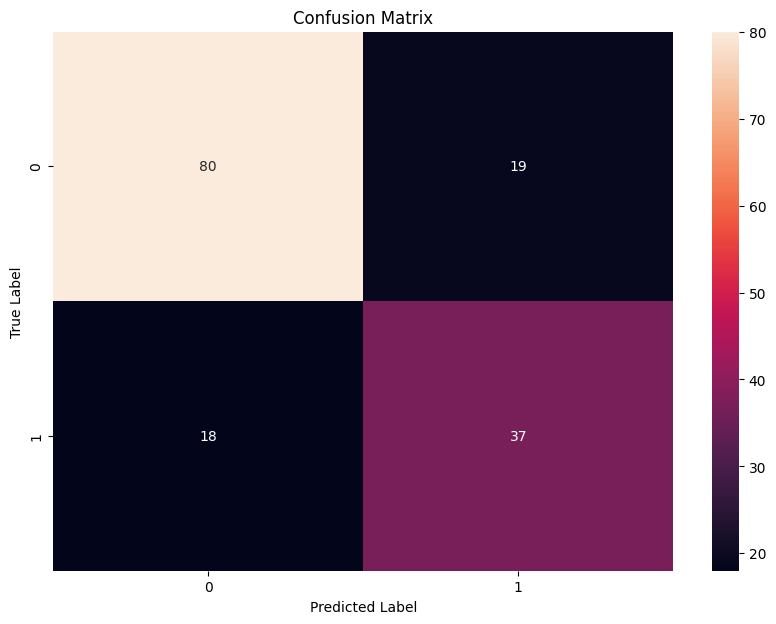

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

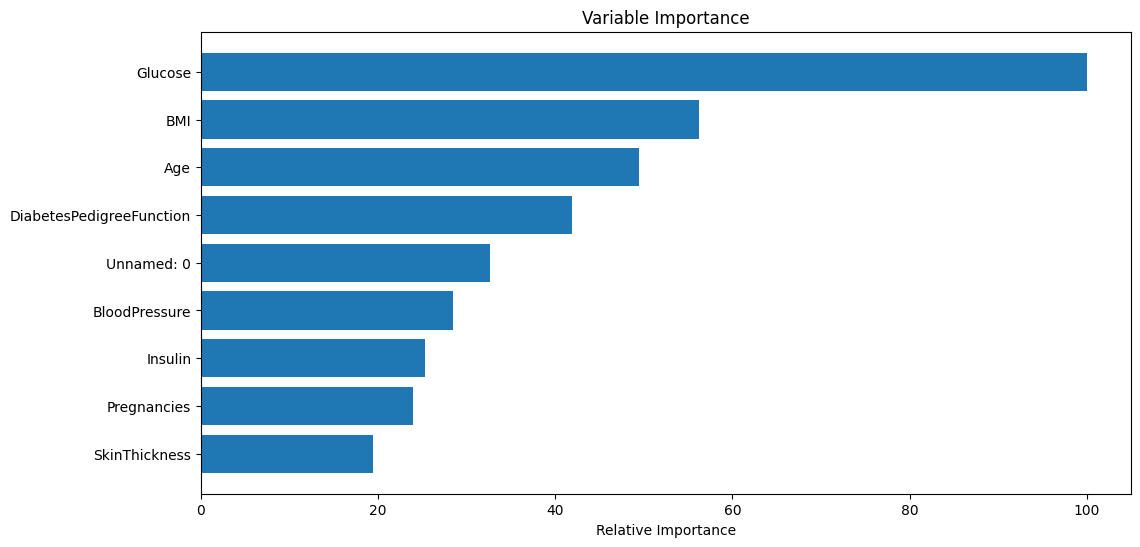

In [47]:
feature_importance = best_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()